<a href="https://colab.research.google.com/github/rpdahxn/GenerativeDeepLearning/blob/main/02_03_deep_learning_conv_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

### 2.4.1 합성곱 층

In [5]:
input_layer = Input(shape = (32, 32, 3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4, 4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3, 3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units = 10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

텐서 크기 확인

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


- (None, 32, 32, 3) : None을 사용해 한꺼번에 **임의의** 개수의 이미지를 네트워크로 통과시킬 수 있다.  
- Param 490 : (4 x 4 x 3 + 1) x 10, 이때 1은 필터마다 포함되는 절편 항
- Param(가중치 개수) 1820 : (3 x 3 x 10 + 1) x 20
- (None, 1280) : (8 x 8 x 20)

In [7]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [9]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 34s 15ms/step - loss: 1.5691 - accuracy: 0.4527 - val_loss: 1.2126 - val_accuracy: 0.5663
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1495 - accuracy: 0.5971 - val_loss: 1.6968 - val_accuracy: 0.4612
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9937 - accuracy: 0.6528 - val_loss: 0.9486 - val_accuracy: 0.6732
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9125 - accuracy: 0.6831 - val_loss: 0.8833 - val_accuracy: 0.6972
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8547 - accuracy: 0.7015 - val_loss: 0.9843 - val_accuracy: 0.6665
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8066 - accuracy: 0.7214 - val_loss: 0.9236 - val_accuracy: 0.6878
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7553 - accuracy: 0.7357 - val_loss: 0.9076 -

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 47ms/step - loss: 0.8478 - accuracy: 0.7058


[0.847781240940094, 0.7057999968528748]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

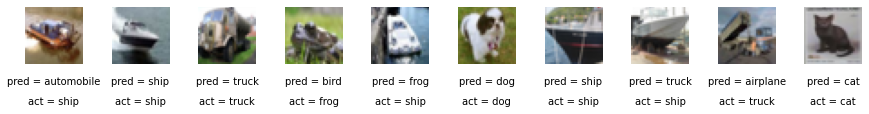

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)